## DATA BREACHES:RISK ASSESSMENT

The aim of the project is to define based on the chronology of the Data Breaches provided on the website https://privacyrights.org/data-breaches which groups are most likely to be targeted by criminal activity in order to steal data and assist businesses in making informative decisions when it comes to:
- investments in Security
- changes in procedures within a business sector or group
- improvements in technologies adopted for prevention

In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split #we need the train_test split 
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline




In [2]:
# reading the data
data = pd.read_csv('PRC_Data_Breach_Chronology_13012020(2).csv')
data.head(5)


,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,https://oag.ca.gov/,2006,40.058324,-74.405661,NaN,NaN,NaN
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,NaN,2012,37.774930,-122.419416,NaN,NaN,NaN
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,NaN,2012,30.267153,-97.743061,NaN,NaN,NaN
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Made Public         9015 non-null   object 
 1   Company                  9015 non-null   object 
 2   City                     5690 non-null   object 
 3   State                    8436 non-null   object 
 4   Type of breach           8926 non-null   object 
 5   Type of organization     9015 non-null   object 
 6   Total Records            9009 non-null   object 
 7   Description of incident  9012 non-null   object 
 8   Information Source       8962 non-null   object 
 9   Source URL               3607 non-null   object 
 10  Year of Breach           9015 non-null   int64  
 11  Latitude                 6541 non-null   float64
 12  Longitude                6541 non-null   float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14             

In [4]:
# Data Exploration and cleaning 

In [5]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]  
data.columns

Index(['date_made_public', 'company', 'city', 'state', 'type_of_breach',
       'type_of_organization', 'total_records', 'description_of_incident',
       'information_source', 'source_url', 'year_of_breach', 'latitude',
       'longitude', 'unnamed:_13', 'unnamed:_14', 'unnamed:_15'],
      dtype='object')

In [6]:
data.drop(['unnamed:_13', 'unnamed:_14','unnamed:_15','description_of_incident','source_url'], axis=1, inplace= True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      9015 non-null   object 
 1   company               9015 non-null   object 
 2   city                  5690 non-null   object 
 3   state                 8436 non-null   object 
 4   type_of_breach        8926 non-null   object 
 5   type_of_organization  9015 non-null   object 
 6   total_records         9009 non-null   object 
 7   information_source    8962 non-null   object 
 8   year_of_breach        9015 non-null   int64  
 9   latitude              6541 non-null   float64
 10  longitude             6541 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 774.9+ KB


In [8]:
n = data.nunique(axis=0) 
  
print("No.of.unique values in each column :\n", 
      n)

No.of.unique values in each column :
 date_made_public        3331
company                 7669
city                    1550
state                    117
type_of_breach             8
type_of_organization       8
total_records           3393
information_source        18
year_of_breach            15
latitude                2443
longitude               2442
dtype: int64


In [9]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3325
state                    579
type_of_breach            89
type_of_organization       0
total_records              6
information_source        53
year_of_breach             0
latitude                2474
longitude               2474
dtype: int64

In [10]:
data.head(50)

,date_made_public,company,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,California Attorney General,2006,40.058324,-74.405661
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,California Attorney General,2012,37.774930,-122.419416
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,California Attorney General,2012,32.715329,-117.157255
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,California Attorney General,2012,30.267153,-97.743061
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",California Attorney General,2012,32.715329,-117.157255
5,3/14/2012,"RJL Insurance Services, LLC, RJL Wealth Manage...",San Diego,California,DISC,BSF,0,California Attorney General,2012,32.715329,-117.157255
6,3/19/2012,Kaiser Foundation Health Plan,Oakland,California,DISC,MED,"30,000",California Attorney General,2012,37.804364,-122.271114
7,3/19/2012,"IndyMac Bank, IndyMac Resources, Inc.",Dallas,Texas,DISC,BSF,0,California Attorney General,2012,32.802955,-96.769923
8,3/23/2012,Manhattan Prep,New York,New York,HACK,BSR,0,California Attorney General,2012,40.714353,-74.005973
9,3/31/2012,St. Joseph's Medical Center,Stockton,California,PHYS,MED,712,California Attorney General,2012,37.957702,-121.290780


In [11]:
#used this to inspect the duplicated rows 
duplicateRowsDF = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     date_made_public                                        company  \
510         11/4/2016                                   Welk Resorts   
5053        7/24/2013                                         Tinder   
6041        2/21/2012                         Ochsner Medical Center   
6412        2/15/2018                      Balasa Dinverno Foltz LLC   
6547        8/15/2019                       Fairfield Medical Center   
7099        4/13/2017                       Area Agency of Aging 1-B   
7487        2/26/2016        Ecolab Health and Welfare Benefits Plan   
8415       11/21/2012  Original Medicine Acupuncture & Wellness, LLC   

                city       state type_of_breach type_of_organization  \
510        Escondido  California           PHYS                  BSO   
5053  West Hollywood  California           DISC                  BSO   
6041     New Orleans   Louisiana           PORT                  MED 

In [12]:
duplicateRowsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 510 to 8415
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      8 non-null      object 
 1   company               8 non-null      object 
 2   city                  4 non-null      object 
 3   state                 8 non-null      object 
 4   type_of_breach        8 non-null      object 
 5   type_of_organization  8 non-null      object 
 6   total_records         8 non-null      object 
 7   information_source    8 non-null      object 
 8   year_of_breach        8 non-null      int64  
 9   latitude              4 non-null      float64
 10  longitude             4 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 768.0+ bytes


In [13]:
#there were 8 rows duplicates now removed
data=data.drop_duplicates()


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9007 entries, 0 to 9014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      9007 non-null   object 
 1   company               9007 non-null   object 
 2   city                  5686 non-null   object 
 3   state                 8428 non-null   object 
 4   type_of_breach        8918 non-null   object 
 5   type_of_organization  9007 non-null   object 
 6   total_records         9001 non-null   object 
 7   information_source    8954 non-null   object 
 8   year_of_breach        9007 non-null   int64  
 9   latitude              6537 non-null   float64
 10  longitude             6537 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 844.4+ KB


In [15]:
# preparing to check the null percentage per each column 
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()

In [16]:
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
2,city,0.368713
9,latitude,0.274231
10,longitude,0.274231
3,state,0.064283
4,type_of_breach,0.009881
7,information_source,0.005884
6,total_records,0.000666
0,date_made_public,0.000000
1,company,0.000000
5,type_of_organization,0.000000


Data to fix with null values:

More than 25%:

2	city	0.368830

9	latitude	0.274432

10	longitude	0.274432

Less than 25% but still to fix:

3	state	0.064226

4	type_of_breach	0.009872

7	information_source	0.005879

6	total_records	0.000666

In [17]:
# preparing function to group states 
data['state'].unique()

array(['New Jersey', 'California', 'Texas', 'New York', 'Illinois',
       'Michigan', 'Connecticut', 'Maryland', 'Delaware', 'Georgia',
       'Oregon', 'Florida', 'Ohio', 'Nebraska', 'Minnesota',
       'Massachusetts', 'Colorado', 'Kentucky', 'District Of Columbia',
       'Nevada', 'North Carolina', 'Missouri', nan, 'Indiana', 'Alaska',
       'Pennsylvania', 'Virginia', 'New Mexico', 'Hawaii', 'Tennessee',
       'Vermont', 'Utah', 'Arizona', 'Kansas', 'Alabama', 'Washington',
       'Ontario', 'Iowa', 'South Carolina', 'Wisconsin', 'Quebec',
       'Grand Bahama', 'Louisiana', 'Buckinghamshire', 'Wyoming',
       'New Hampshire', 'Cheshire', 'Oklahoma', 'British Columbia',
       'Noord Holland', 'Mississippi', 'Arkansas', 'Rhode Island',
       'Maine', 'Montana', 'London', 'Idaho', 'West Virginia',
       'South Dakota', 'North Dakota', 'Puerto Rico', 'Tokyo', 'Beijing',
       'Berlin', 'Dublin', 'Guangdong', 'VA', 'CA', 'MO', 'CT', 'OH',
       'FL', 'PA', 'WI', 'MI', 'CO', '

In [18]:
def clean(x):    
    if x in ['Washington', 'WA']:
        return 'WA'
    elif x in ['Arizona','AZ']:
        return 'AZ'
    elif x in ['California','CA']:
        return 'CA'
    elif x in ['Nevada','NV']:
        return 'NV'
    elif x in ['Oregon','OR']:
        return 'OR'
    elif x in ['New Jersey','NJ']:
        return 'NJ'
    elif x in ['New York','NY']:
        return 'NY'
    elif x in ['Texas','TX']:
        return 'TX'
    elif x in ['Illinois','IL']:
        return 'IL'
    elif x in ['Michigan','MI']:
        return 'MI'
    elif x in ['Connecticut','CT']:
        return 'CT'
    elif x in ['Delaware','DE']:
        return 'DE'
    elif x in ['Maryland','MD']:
        return 'MD'
    elif x in ['Georgia','GA']:
        return 'GA'
    elif x in ['Florida','FL']:
        return 'FL'
    elif x in ['Ohio','OH']:
        return 'OH'
    elif x in ['Nebraska','IL']:
        return 'IL'
    elif x in ['Minnesota','MN']:
        return 'MN'
    elif x in ['Massachusetts','MA']:
        return 'MA'
    elif x in ['Colorado','CO']:
        return 'CO'
    elif x in ['Kentucky','KY']:
        return 'KY'
    elif x in ['District Of Columbia','DC']:
        return 'DC'
    elif x in ['Nevada','NV']:
        return 'NV'
    elif x in ['North Carolina','NC']:
        return 'NC'
    elif x in ['Missouri','MO']:
        return 'MO'
    elif x in ['Indiana','IN']:
        return 'IN'
    elif x in ['Alaska','AK']:
        return 'AK'
    elif x in ['Pennsylvania','PA']:
        return 'PA'
    elif x in ['Virginia','VA']:
        return 'VA'
    elif x in ['New Mexico','NM']:
        return 'NM'
    elif x in ['Hawaii','HI']:
        return 'HI'
    elif x in ['Tennessee','TN']:
        return 'TN'
    elif x in ['Vermont','VT']:
        return 'VT'
    elif x in ['Utah','UT']:
        return 'UT'
    elif x in ['Kansas','KS']:
        return 'KS'
    elif x in ['Alabama','AL']:
        return 'AL'
    elif x in ['Ontario','ON']:
        return 'ON'
    elif x in ['Iowa','IA']:
        return 'IA'
    elif x in ['South Carolina','SC']:
        return 'SC'
    elif x in ['Wisconsin','WI']:
        return 'WI'
    elif x in ['Quebec','QC']:
        return 'QC'
    elif x in ['Louisiana','LA']:
        return 'LA'
    elif x in ['Wyoming','WY']:
        return 'WY'
    elif x in ['New Hampshire','NH']:
        return 'NH'
    elif x in ['Oklahoma','OK']:
        return 'OK'
    elif x in ['Mississippi','MS']:
        return 'MS'
    elif x in ['Arkansas','AR']:
        return 'AR'
    elif x in ['Rhode Island','RI']:
        return 'RI'
    elif x in ['Maine','ME']:
        return 'ME'
    elif x in ['Montana','MT']:
        return 'MT'
    elif x in ['Idaho','ID']:
        return 'ID'
    elif x in ['West Virginia','WV']:
        return 'WV'
    elif x in ['South Dakota','SD']:
        return 'SD'
    elif x in ['North Dakota','ND']:
        return 'ND'
    elif x in ['Puerto Rico','PR']:
        return 'PR'
    elif x in ['Grand Bahama']:
        return 'Bahamas'
    elif x in ['Buckinghamshire ','Cheshire']:
        return 'UK'
    elif x in ['British Columbia']:
        return 'Canada'
    elif x in ['Noord Holland']:
        return 'Netherlands '
    elif x in ['Tokyo']:
        return 'Japan'
    elif x in ['Beijing','Guangdong']:
        return 'China'
    elif x in ['Berlin']:
        return 'Germany'
    elif x in ['Dublin']:
        return 'Ireland'
   


In [19]:
data['state'] = list(map(clean, data['state']))

In [20]:
data['state'].value_counts(sorted).reset_index()

,index,state
0,CA,0.158915
1,NY,0.073510
2,TX,0.069109
3,FL,0.054478
4,IL,0.043773
...,...,...
56,Japan,0.000119
57,Germany,0.000119
58,UK,0.000119
59,Bahamas,0.000119


In [21]:
data['state'].isna().sum()

600

In [22]:
# mapping the null, the dataset is not consistent in terms of positioning of null
# values and might happen that you have a city corresponding to a State in a row
# and the next row you have the city but not the state. Whenever the information could match we will match it.

state = data.dropna(subset=['state']).drop_duplicates('city').set_index('city')['state']
data['state'] = data['state'].fillna(data['city'].map(state))

In [23]:
data['state'].isna().sum()

11

In [24]:
data2 = data[data.isna().any(axis=1)]
print (data2)

     date_made_public                                            company  \
0            3/3/2006                                      PayDay OK LLC   
100         2/19/2013                                       Hotusa Group   
104         2/28/2013         First National Bank of Southern California   
175        12/30/2013                                  T-Mobile Supplier   
342         8/12/2015                                          ICANN.org   
...               ...                                                ...   
9010       11/20/2009                                  Mark D. Lurie, MD   
9011       11/17/2009  Health Services for Children with Special Need...   
9012       10/30/2009    Alaska Department of Health and Social Services   
9013       10/28/2009          Mid America Kidney Stone Association, LLC   
9014       10/21/2009                         Brooke Army Medical Center   

                            city state type_of_breach type_of_organization  \
0        

In [25]:
data['state'].isna().sum()

11

In [26]:
data['type_of_breach'].value_counts(sorted).reset_index()

,index,type_of_breach
0,HACK,0.283808
1,DISC,0.208343
2,PHYS,0.194102
3,PORT,0.131307
4,UNKN,0.078941
5,INSD,0.067952
6,STAT,0.027921
7,CARD,0.007625


In [27]:
# type_of_breach have a very low number of nulls, not even 1%, we will replace with the most category
data['type_of_breach'].isna().sum()

89

In [28]:
most = data['type_of_breach'].value_counts(sorted).reset_index().iloc[0,0]

In [29]:
data['type_of_breach'] = data['type_of_breach'].fillna(most)

In [30]:
data['type_of_breach'].isna().sum()

0

In [31]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3321
state                     11
type_of_breach             0
type_of_organization       0
total_records              6
information_source        53
year_of_breach             0
latitude                2470
longitude               2470
dtype: int64

In [32]:
data['information_source'].value_counts(sorted).reset_index()

,index,information_source
0,US Department of Health and Human Services,0.275854
1,Dataloss DB,0.196225
2,Media,0.118606
3,Databreaches.net,0.095041
4,California Attorney General,0.080969
5,PHIPrivacy.net,0.061537
6,Indiana Attorney General,0.055729
7,Maryland Attorney General,0.034733
8,Government Agency,0.028032
9,HHS via PHIPrivacy.net,0.024123


In [33]:
# As we do not know what is the information source we will change the null with unknown 

data["information_source"].fillna("Unknown", inplace = True) 


In [34]:
data['information_source'].value_counts(sorted).reset_index()

,index,information_source
0,US Department of Health and Human Services,0.274231
1,Dataloss DB,0.195071
2,Media,0.117908
3,Databreaches.net,0.094482
4,California Attorney General,0.080493
5,PHIPrivacy.net,0.061175
6,Indiana Attorney General,0.055401
7,Maryland Attorney General,0.034529
8,Government Agency,0.027867
9,HHS via PHIPrivacy.net,0.023981


In [35]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3321
state                     11
type_of_breach             0
type_of_organization       0
total_records              6
information_source         0
year_of_breach             0
latitude                2470
longitude               2470
dtype: int64

In [36]:
data['total_records'].value_counts(sorted).reset_index()

,index,total_records
0,0,0.242640
1,500,0.014776
2,1,0.012999
3,"2,000",0.005777
4,100,0.005444
...,...,...
3388,7923,0.000111
3389,3881,0.000111
3390,"2,385",0.000111
3391,5848,0.000111


In [37]:
data['total_records'].unique

<bound method Series.unique of 0           88
1            0
2            0
3            0
4       14,000
         ...  
9010      5166
9011      3800
9012       501
9013      1000
9014      1000
Name: total_records, Length: 9007, dtype: object>

In [38]:
# changing dtype per total records to make it numeric

data['total_records'] = data['total_records'].str.replace(",","").astype(float)


In [39]:
data['total_records'].unique

<bound method Series.unique of 0          88.0
1           0.0
2           0.0
3           0.0
4       14000.0
         ...   
9010     5166.0
9011     3800.0
9012      501.0
9013     1000.0
9014     1000.0
Name: total_records, Length: 9007, dtype: float64>

In [40]:
# filled the 6 nulls with the mean 
data['total_records'] = data['total_records'].fillna(np.mean(data['total_records']))

In [41]:
data.isnull().sum()


date_made_public           0
company                    0
city                    3321
state                     11
type_of_breach             0
type_of_organization       0
total_records              0
information_source         0
year_of_breach             0
latitude                2470
longitude               2470
dtype: int64

In [42]:
# mapping the null, the dataset is not consistent in terms of positioning of null
# values and might happen that you have a city corresponding to a State in a row
# and the next row you have the state but not the city. Whenever the information could match we will match it. 

city = data.dropna(subset=['city']).drop_duplicates('state').set_index('state')['city']
data['city'] = data['city'].fillna(data['state'].map(city))

In [43]:
data.isnull().sum()


date_made_public           0
company                    0
city                       4
state                     11
type_of_breach             0
type_of_organization       0
total_records              0
information_source         0
year_of_breach             0
latitude                2470
longitude               2470
dtype: int64

In [44]:
data['city'].unique()

array(['Princeton', 'San Francisco', 'San Diego', ..., 'Carle Place',
       'Ft. Meyers', 'Boonville'], dtype=object)

In [45]:
data['city'].value_counts(sorted).reset_index()

,index,city
0,Princeton,0.070310
1,San Francisco,0.049428
2,New York,0.043874
3,Austin,0.028546
4,Silver Spring,0.025991
...,...,...
1545,Idaho Falls,0.000111
1546,Imperial,0.000111
1547,Rockford,0.000111
1548,Pearl City,0.000111


In [46]:
# same preprocessing as we did above 
latitude = data.dropna(subset=['latitude']).drop_duplicates('city').set_index('city')['latitude']
data['latitude'] = data['latitude'].fillna(data['city'].map(latitude))

In [47]:
data.isnull().sum()


date_made_public           0
company                    0
city                       4
state                     11
type_of_breach             0
type_of_organization       0
total_records              0
information_source         0
year_of_breach             0
latitude                   0
longitude               2470
dtype: int64

In [48]:
# same preprocessing as we did above 

longitude = data.dropna(subset=['longitude']).drop_duplicates('city').set_index('city')['longitude']
data['longitude'] = data['longitude'].fillna(data['city'].map(longitude))

In [49]:
data.isnull().sum()


date_made_public         0
company                  0
city                     4
state                   11
type_of_breach           0
type_of_organization     0
total_records            0
information_source       0
year_of_breach           0
latitude                 0
longitude                0
dtype: int64

In [50]:
state1 = data.dropna(subset=['state']).drop_duplicates('latitude').set_index('latitude')['state']
data['state'] = data['state'].fillna(data['latitude'].map(state1))

In [51]:
data.isnull().sum()


date_made_public        0
company                 0
city                    4
state                   8
type_of_breach          0
type_of_organization    0
total_records           0
information_source      0
year_of_breach          0
latitude                0
longitude               0
dtype: int64

In [52]:
# alternative solution https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6 was an alternative solution for geocode 

In [53]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9007 entries, 0 to 9014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      9007 non-null   object 
 1   company               9007 non-null   object 
 2   city                  9003 non-null   object 
 3   state                 8999 non-null   object 
 4   type_of_breach        9007 non-null   object 
 5   type_of_organization  9007 non-null   object 
 6   total_records         9007 non-null   float64
 7   information_source    9007 non-null   object 
 8   year_of_breach        9007 non-null   int64  
 9   latitude              9007 non-null   float64
 10  longitude             9007 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 844.4+ KB


In [54]:
# inspecting the last null values 
data[data.isna().any(axis=1)]

,date_made_public,company,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude
175,12/30/2013,T-Mobile Supplier,Unknown,NaN,HACK,BSO,0.0,California Attorney General,2013,46.498432,-116.724759
342,8/12/2015,ICANN.org,"Los Angeles, CA 90094-2536",NaN,HACK,NGO,0.0,California Attorney General,2015,33.982885,-118.404731
521,11/23/2016,"Atlantis, Paradise Island",NaN,Bahamas,HACK,BSO,0.0,California Attorney General,2016,26.659447,-78.520650
601,3/29/2017,Oilandgasjobsearch.com,NaN,UK,HACK,BSO,0.0,California Attorney General,2017,53.438197,-2.165726
4342,12/28/2016,InterContinental Hotels Group (IHG),Denham,NaN,HACK,BSO,0.0,Krebs On Security,2016,51.569583,-0.493857
4901,7/23/2012,Gamigo,Hamburg,NaN,HACK,BSR,3000000.0,Media,2012,53.551085,9.993682
5237,3/3/2014,Mt. Gox- Worlds Largest Bitcoin Exchange,NaN,Japan,HACK,BSF,0.0,Media,2014,35.689488,139.691706
5258,4/6/2014,BigMoneyJobs.com,Uknown,NaN,HACK,BSO,36802.0,Media,2014,41.626271,-79.673584
5435,11/27/2015,Rockland Nissan,Blauvelt,NaN,INSD,BSO,0.0,Media,2015,41.063430,-73.957638
5633,8/5/2017,Parkbytext,NaN,Ireland,HACK,BSO,0.0,Media,2017,53.349805,-6.260310


In [55]:
# providing the right location in each row 
data.at[175,'state']= 'Unknown'
data.at[342,'state']= 'CA'
data.at[521,'city']= 'Nassau'
data.at[601,'city']= 'London'
data.at[4342,'state']= 'UK'
data.at[4901,'state']= 'Germany'
data.at[5237,'city']= 'Tokyo'
data.at[5258,'state']= 'Unknown'
data.at[5435,'state']= 'NY'
data.at[5633,'city']= 'Dublin'
data.at[5664,'state']= 'China'
data.at[6077,'state']= 'MA'
data.at[6077,'city']= 'Boston'


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9007 entries, 0 to 9014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_made_public      9007 non-null   object 
 1   company               9007 non-null   object 
 2   city                  9007 non-null   object 
 3   state                 9007 non-null   object 
 4   type_of_breach        9007 non-null   object 
 5   type_of_organization  9007 non-null   object 
 6   total_records         9007 non-null   float64
 7   information_source    9007 non-null   object 
 8   year_of_breach        9007 non-null   int64  
 9   latitude              9007 non-null   float64
 10  longitude             9007 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.1+ MB


In [57]:
# The column City has 1500 unique values and instead of discarding it as it would influence the dummy process 
# we will make it ordinal 

from sklearn.preprocessing import LabelEncoder

# Creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "City_N" 
data['city_n'] = labelencoder.fit_transform(data['city'])

# display Dataframe
data 

,date_made_public,company,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude,city_n
0,3/3/2006,PayDay OK LLC,Princeton,NJ,HACK,BSF,88.0,California Attorney General,2006,40.058324,-74.405661,1112
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,CA,PORT,BSF,0.0,California Attorney General,2012,37.774930,-122.419416,1205
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,CA,PORT,BSR,0.0,California Attorney General,2012,32.715329,-117.157255,1203
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,TX,HACK,BSF,0.0,California Attorney General,2012,30.267153,-97.743061,64
4,3/12/2012,"Impairment Resources, LLC",San Diego,CA,PORT,MED,14000.0,California Attorney General,2012,32.715329,-117.157255,1203
...,...,...,...,...,...,...,...,...,...,...,...,...
9010,11/20/2009,"Mark D. Lurie, MD",San Francisco,CA,PHYS,MED,5166.0,US Department of Health and Human Services,2009,37.774930,-122.419416,1205
9011,11/17/2009,Health Services for Children with Special Need...,Washington,DC,PHYS,MED,3800.0,US Department of Health and Human Services,2009,38.895112,-77.036366,1450
9012,10/30/2009,Alaska Department of Health and Social Services,Ketchikan,AK,PHYS,MED,501.0,US Department of Health and Human Services,2009,55.342222,-131.646111,665
9013,10/28/2009,"Mid America Kidney Stone Association, LLC",St. Louis,MO,PHYS,MED,1000.0,US Department of Health and Human Services,2009,38.627003,-90.199404,1318


In [58]:

# Assigning numerical values and storing it in another column called "City_N" 
data['state_n'] = labelencoder.fit_transform(data['state'])

# display Dataframe
data 

,date_made_public,company,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude,city_n,state_n
0,3/3/2006,PayDay OK LLC,Princeton,NJ,HACK,BSF,88.0,California Attorney General,2006,40.058324,-74.405661,1112,36
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,CA,PORT,BSF,0.0,California Attorney General,2012,37.774930,-122.419416,1205,5
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,CA,PORT,BSR,0.0,California Attorney General,2012,32.715329,-117.157255,1203,5
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,TX,HACK,BSF,0.0,California Attorney General,2012,30.267153,-97.743061,64,52
4,3/12/2012,"Impairment Resources, LLC",San Diego,CA,PORT,MED,14000.0,California Attorney General,2012,32.715329,-117.157255,1203,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,11/20/2009,"Mark D. Lurie, MD",San Francisco,CA,PHYS,MED,5166.0,US Department of Health and Human Services,2009,37.774930,-122.419416,1205,5
9011,11/17/2009,Health Services for Children with Special Need...,Washington,DC,PHYS,MED,3800.0,US Department of Health and Human Services,2009,38.895112,-77.036366,1450,10
9012,10/30/2009,Alaska Department of Health and Social Services,Ketchikan,AK,PHYS,MED,501.0,US Department of Health and Human Services,2009,55.342222,-131.646111,665,0
9013,10/28/2009,"Mid America Kidney Stone Association, LLC",St. Louis,MO,PHYS,MED,1000.0,US Department of Health and Human Services,2009,38.627003,-90.199404,1318,30


### Change date_made_public column to datetime format.


In [59]:
data['date_made_public'] = pd.to_datetime(data.date_made_public)


In [60]:
data['date_made_public']

0      2006-03-03
1      2012-01-04
2      2012-02-18
3      2012-02-22
4      2012-03-12
          ...    
9010   2009-11-20
9011   2009-11-17
9012   2009-10-30
9013   2009-10-28
9014   2009-10-21
Name: date_made_public, Length: 9007, dtype: datetime64[ns]

In [61]:
cat = data.select_dtypes('object')
num = data.select_dtypes(np.number)

In [62]:
for i in cat:
    print(str(i) + ' ' + str(len(data[i].unique())))

company 7669
city 1550
state 62
type_of_breach 8
type_of_organization 8
information_source 19


In [63]:
for i in num:
    print(str(i) + ' ' + str(len(data[i].unique())))

total_records 2865
year_of_breach 15
latitude 2443
longitude 2442
city_n 1550
state_n 62


In [64]:
data = data.set_index("company")


In [65]:
data.head()

,date_made_public,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude,city_n,state_n
company,,,,,,,,,,,,
PayDay OK LLC,2006-03-03,Princeton,NJ,HACK,BSF,88.0,California Attorney General,2006,40.058324,-74.405661,1112,36
"SF Fire Credit Union, Pacifica-Coastside Credit Union",2012-01-04,San Francisco,CA,PORT,BSF,0.0,California Attorney General,2012,37.774930,-122.419416,1205,5
"BDO USA, Rubio's Restaurants, Inc.",2012-02-18,San Diego,CA,PORT,BSR,0.0,California Attorney General,2012,32.715329,-117.157255,1203,5
"DHI Mortgage Company, Ltd.",2012-02-22,Austin,TX,HACK,BSF,0.0,California Attorney General,2012,30.267153,-97.743061,64,52
"Impairment Resources, LLC",2012-03-12,San Diego,CA,PORT,MED,14000.0,California Attorney General,2012,32.715329,-117.157255,1203,5


In [66]:
# checking the null hyphotesis for the correlation among features 

from itertools import combinations
from scipy.stats import chi2_contingency



def data_corr_mat(df,confidence):
    columns = df.columns
    chi = pd.DataFrame(index=columns, columns=columns)
    p = pd.DataFrame(index=columns, columns=columns)
    nh = pd.DataFrame(index=columns, columns=columns)
    dof = pd.DataFrame(index=columns, columns=columns)
    for var1, var2 in combinations(columns, 2):
        cont_table = pd.crosstab(df[var1], df[var2], margins=False)
        chi2_stat= chi2_contingency(cont_table)[0]
        p_stat= chi2_contingency(cont_table)[1]
        chi.loc[var2, var1] = chi2_stat
        chi.loc[var1, var2] = chi2_stat
        p.loc[var2, var1] = p_stat
        p.loc[var1, var2] = p_stat
        dof_stat= chi2_contingency(cont_table)[2]
        dof.loc[var2, var1] = dof_stat
        dof.loc[var1, var2] = dof_stat
        if p.loc[var2, var1] < confidence:
            nh.loc[var2, var1]='rejected'
        else:
            nh.loc[var2, var1]='accepted'
        if p.loc[var1, var2] < confidence:
            nh.loc[var1, var2]='rejected'
        else:
            nh.loc[var1, var2]='accepted'   
    chi.fillna(0, inplace=True)
    p.fillna(0, inplace=True)
    return chi,p,nh,dof

chi,p,nh,dof=data_corr_mat(cat,.05) 

In [67]:
nh

,company,city,state,type_of_breach,type_of_organization,information_source
company,NaN,rejected,rejected,rejected,rejected,rejected
city,rejected,NaN,rejected,rejected,rejected,rejected
state,rejected,rejected,NaN,rejected,rejected,rejected
type_of_breach,rejected,rejected,rejected,NaN,rejected,rejected
type_of_organization,rejected,rejected,rejected,rejected,NaN,rejected
information_source,rejected,rejected,rejected,rejected,rejected,NaN


In [68]:
p

,company,city,state,type_of_breach,type_of_organization,information_source
company,0.000000e+00,0.0,0.0,6.797394e-12,3.473869e-112,1.867137e-23
city,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
state,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
type_of_breach,6.797394e-12,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
type_of_organization,3.473869e-112,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
information_source,1.867137e-23,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00


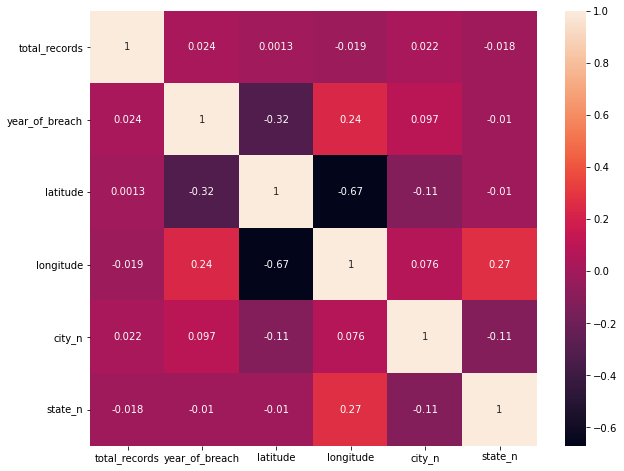

In [69]:
corr_matrix=num.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [70]:
# longitude, year of breach

In [71]:
data.columns

Index(['date_made_public', 'city', 'state', 'type_of_breach',
       'type_of_organization', 'total_records', 'information_source',
       'year_of_breach', 'latitude', 'longitude', 'city_n', 'state_n'],
      dtype='object')

In [72]:
data['type_of_organization'].value_counts(dropna=False)  


MED     4338
BSO     1043
EDU      848
BSF      786
GOV      781
BSR      623
UNKN     469
NGO      119
Name: type_of_organization, dtype: int64

In [73]:
data['year_of_breach'].value_counts(dropna=False)  


2013    902
2012    895
2017    873
2014    872
2016    830
2010    806
2011    797
2018    707
2015    554
2006    482
2007    456
2008    355
2009    271
2005    136
2019     71
Name: year_of_breach, dtype: int64

In [74]:
cat

,company,city,state,type_of_breach,type_of_organization,information_source
0,PayDay OK LLC,Princeton,NJ,HACK,BSF,California Attorney General
1,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,CA,PORT,BSF,California Attorney General
2,"BDO USA, Rubio's Restaurants, Inc.",San Diego,CA,PORT,BSR,California Attorney General
3,"DHI Mortgage Company, Ltd.",Austin,TX,HACK,BSF,California Attorney General
4,"Impairment Resources, LLC",San Diego,CA,PORT,MED,California Attorney General
...,...,...,...,...,...,...
9010,"Mark D. Lurie, MD",San Francisco,CA,PHYS,MED,US Department of Health and Human Services
9011,Health Services for Children with Special Need...,Washington,DC,PHYS,MED,US Department of Health and Human Services
9012,Alaska Department of Health and Social Services,Ketchikan,AK,PHYS,MED,US Department of Health and Human Services
9013,"Mid America Kidney Stone Association, LLC",St. Louis,MO,PHYS,MED,US Department of Health and Human Services


In [75]:
num

,total_records,year_of_breach,latitude,longitude,city_n,state_n
0,88.0,2006,40.058324,-74.405661,1112,36
1,0.0,2012,37.774930,-122.419416,1205,5
2,0.0,2012,32.715329,-117.157255,1203,5
3,0.0,2012,30.267153,-97.743061,64,52
4,14000.0,2012,32.715329,-117.157255,1203,5
...,...,...,...,...,...,...
9010,5166.0,2009,37.774930,-122.419416,1205,5
9011,3800.0,2009,38.895112,-77.036366,1450,10
9012,501.0,2009,55.342222,-131.646111,665,0
9013,1000.0,2009,38.627003,-90.199404,1318,30


In [76]:
#making a copy of the original dataframe 
data_copy=data.copy()
data_copy.head()

,date_made_public,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude,city_n,state_n
company,,,,,,,,,,,,
PayDay OK LLC,2006-03-03,Princeton,NJ,HACK,BSF,88.0,California Attorney General,2006,40.058324,-74.405661,1112,36
"SF Fire Credit Union, Pacifica-Coastside Credit Union",2012-01-04,San Francisco,CA,PORT,BSF,0.0,California Attorney General,2012,37.774930,-122.419416,1205,5
"BDO USA, Rubio's Restaurants, Inc.",2012-02-18,San Diego,CA,PORT,BSR,0.0,California Attorney General,2012,32.715329,-117.157255,1203,5
"DHI Mortgage Company, Ltd.",2012-02-22,Austin,TX,HACK,BSF,0.0,California Attorney General,2012,30.267153,-97.743061,64,52
"Impairment Resources, LLC",2012-03-12,San Diego,CA,PORT,MED,14000.0,California Attorney General,2012,32.715329,-117.157255,1203,5


In [77]:
# log transformed to make the data on total records less skewed 

data_copy['total_records']=np.log(data_copy['total_records']+1)

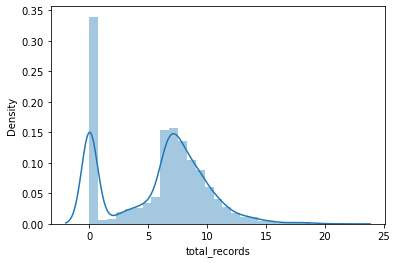

In [78]:
sns.distplot(data_copy[data_copy['total_records'].isna()==False]['total_records']) 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

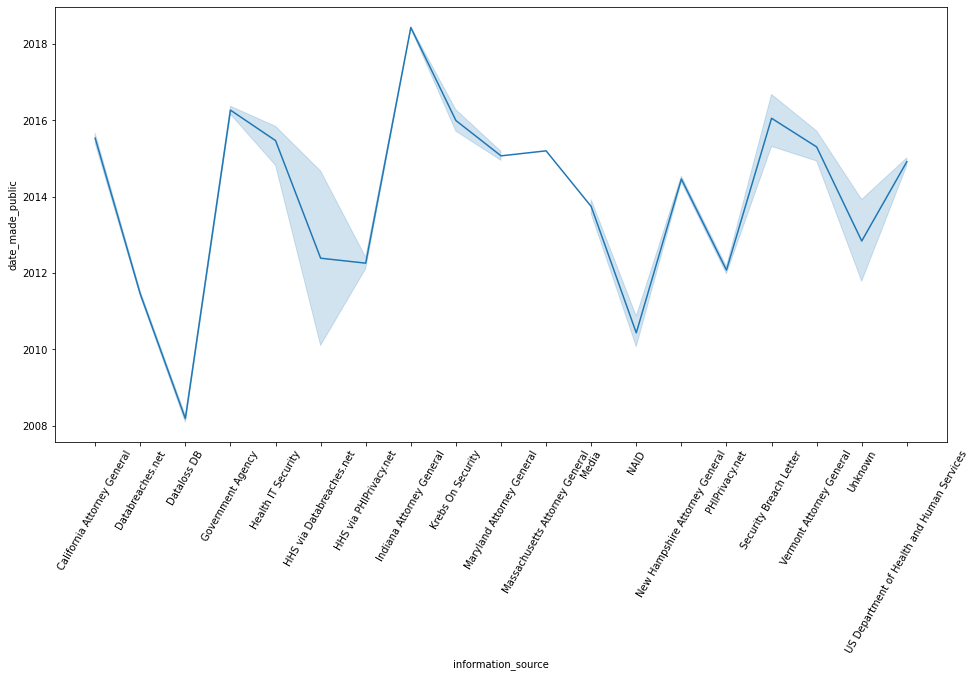

In [79]:
# checking frequency of information source vs date 

plt.figure(figsize=(16,8))

sns.lineplot(x = 'information_source', y = 'date_made_public', data = data_copy) 
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

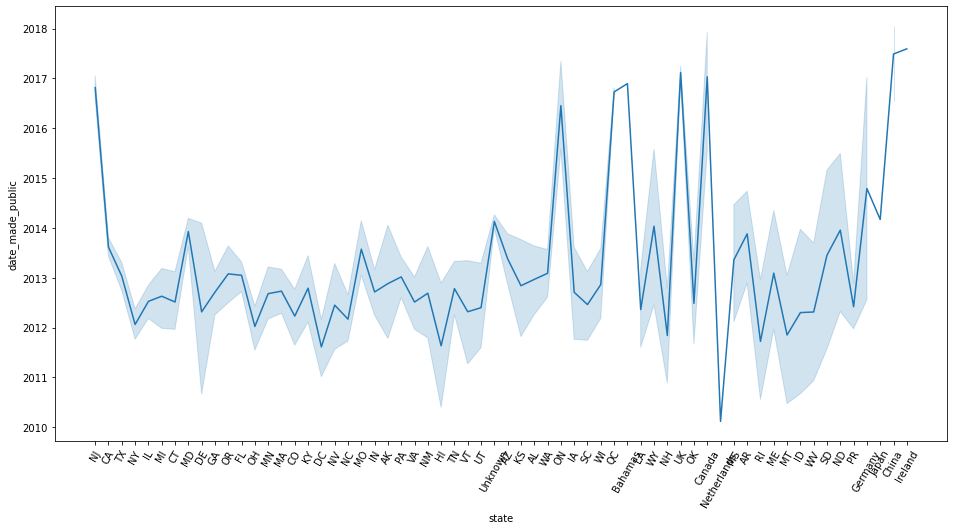

In [80]:
# checking the most reporting states 
plt.figure(figsize=(16,8))

sns.lineplot(x = 'state', y = 'date_made_public', data = data_copy) 
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

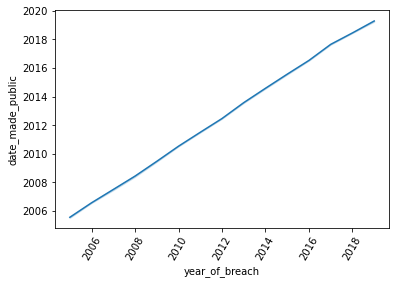

In [81]:
#this means that there is no discrepancy between year of breach and date made public, we will use in our model year of breach but not the 2 of them

sns.lineplot(x = 'year_of_breach', y = 'date_made_public', data = data_copy) 
plt.xticks(rotation=60)
plt.show

In [82]:

for i in data_copy.columns:
    print(str(i) + ' ' + str(len(data_copy[i].unique())))

date_made_public 3331
city 1550
state 62
type_of_breach 8
type_of_organization 8
total_records 2865
information_source 19
year_of_breach 15
latitude 2443
longitude 2442
city_n 1550
state_n 62


In [83]:
data_copy.drop('date_made_public',axis='columns', inplace=True)

In [84]:
# dropping city and state as we have already ordinalized before the columns  with LabelEncoder 

data_copy.drop('city',axis='columns', inplace=True)

In [85]:
data_copy.drop('state',axis='columns', inplace=True)

In [86]:
data_copy

,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude,city_n,state_n
company,,,,,,,,,
PayDay OK LLC,HACK,BSF,4.488636,California Attorney General,2006,40.058324,-74.405661,1112,36
"SF Fire Credit Union, Pacifica-Coastside Credit Union",PORT,BSF,0.000000,California Attorney General,2012,37.774930,-122.419416,1205,5
"BDO USA, Rubio's Restaurants, Inc.",PORT,BSR,0.000000,California Attorney General,2012,32.715329,-117.157255,1203,5
"DHI Mortgage Company, Ltd.",HACK,BSF,0.000000,California Attorney General,2012,30.267153,-97.743061,64,52
"Impairment Resources, LLC",PORT,MED,9.546884,California Attorney General,2012,32.715329,-117.157255,1203,5
...,...,...,...,...,...,...,...,...,...
"Mark D. Lurie, MD",PHYS,MED,8.550048,US Department of Health and Human Services,2009,37.774930,-122.419416,1205,5
"Health Services for Children with Special Needs, Inc.",PHYS,MED,8.243019,US Department of Health and Human Services,2009,38.895112,-77.036366,1450,10
Alaska Department of Health and Social Services,PHYS,MED,6.218600,US Department of Health and Human Services,2009,55.342222,-131.646111,665,0


In [87]:
#splitting categoricals and numericals 
cat = data_copy.select_dtypes('object')
num = data_copy.select_dtypes(np.number)

In [88]:
cat

,type_of_breach,type_of_organization,information_source
company,,,
PayDay OK LLC,HACK,BSF,California Attorney General
"SF Fire Credit Union, Pacifica-Coastside Credit Union",PORT,BSF,California Attorney General
"BDO USA, Rubio's Restaurants, Inc.",PORT,BSR,California Attorney General
"DHI Mortgage Company, Ltd.",HACK,BSF,California Attorney General
"Impairment Resources, LLC",PORT,MED,California Attorney General
...,...,...,...
"Mark D. Lurie, MD",PHYS,MED,US Department of Health and Human Services
"Health Services for Children with Special Needs, Inc.",PHYS,MED,US Department of Health and Human Services
Alaska Department of Health and Social Services,PHYS,MED,US Department of Health and Human Services


In [89]:
num

,total_records,year_of_breach,latitude,longitude,city_n,state_n
company,,,,,,
PayDay OK LLC,4.488636,2006,40.058324,-74.405661,1112,36
"SF Fire Credit Union, Pacifica-Coastside Credit Union",0.000000,2012,37.774930,-122.419416,1205,5
"BDO USA, Rubio's Restaurants, Inc.",0.000000,2012,32.715329,-117.157255,1203,5
"DHI Mortgage Company, Ltd.",0.000000,2012,30.267153,-97.743061,64,52
"Impairment Resources, LLC",9.546884,2012,32.715329,-117.157255,1203,5
...,...,...,...,...,...,...
"Mark D. Lurie, MD",8.550048,2009,37.774930,-122.419416,1205,5
"Health Services for Children with Special Needs, Inc.",8.243019,2009,38.895112,-77.036366,1450,10
Alaska Department of Health and Social Services,6.218600,2009,55.342222,-131.646111,665,0


In [90]:
# dummify the categorical columns we still have 
data_copy=pd.get_dummies(data_copy,drop_first=True)
print("data encoded with dummies!") 

data encoded with dummies!


In [91]:
data_copy

,total_records,year_of_breach,latitude,longitude,city_n,state_n,type_of_breach_DISC,type_of_breach_HACK,type_of_breach_INSD,type_of_breach_PHYS,type_of_breach_PORT,type_of_breach_STAT,type_of_breach_UNKN,type_of_organization_BSO,type_of_organization_BSR,type_of_organization_EDU,type_of_organization_GOV,type_of_organization_MED,type_of_organization_NGO,type_of_organization_UNKN,information_source_Databreaches.net,information_source_Dataloss DB,information_source_Government Agency,information_source_HHS via Databreaches.net,information_source_HHS via PHIPrivacy.net,information_source_Health IT Security,information_source_Indiana Attorney General,information_source_Krebs On Security,information_source_Maryland Attorney General,information_source_Massachusetts Attorney General,information_source_Media,information_source_NAID,information_source_New Hampshire Attorney General,information_source_PHIPrivacy.net,information_source_Security Breach Letter,information_source_US Department of Health and Human Services,information_source_Unknown,information_source_Vermont Attorney General
company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PayDay OK LLC,4.488636,2006,40.058324,-74.405661,1112,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"SF Fire Credit Union, Pacifica-Coastside Credit Union",0.000000,2012,37.774930,-122.419416,1205,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"BDO USA, Rubio's Restaurants, Inc.",0.000000,2012,32.715329,-117.157255,1203,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"DHI Mortgage Company, Ltd.",0.000000,2012,30.267153,-97.743061,64,52,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Impairment Resources, LLC",9.546884,2012,32.715329,-117.157255,1203,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Mark D. Lurie, MD",8.550048,2009,37.774930,-122.419416,1205,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
"Health Services for Children with Special Needs, Inc.",8.243019,2009,38.895112,-77.036366,1450,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Alaska Department of Health and Social Services,6.218600,2009,55.342222,-131.646111,665,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [92]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9007 entries, PayDay OK LLC to Brooke Army Medical Center
Data columns (total 38 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   total_records                                                  9007 non-null   float64
 1   year_of_breach                                                 9007 non-null   int64  
 2   latitude                                                       9007 non-null   float64
 3   longitude                                                      9007 non-null   float64
 4   city_n                                                         9007 non-null   int32  
 5   state_n                                                        9007 non-null   int32  
 6   type_of_breach_DISC                                            9007 non-null   uint8  
 7   type_of_breach_HACK            

In [93]:
X_prep = StandardScaler().fit_transform(data_copy)


In [94]:
X_prep

array([[-0.34135561, -1.84839987,  0.44285026, ..., -0.61469437,
        -0.07693596, -0.06762271],
       [-1.43185092, -0.18376806,  0.22421718, ..., -0.61469437,
        -0.07693596, -0.06762271],
       [-1.43185092, -0.18376806, -0.26023541, ..., -0.61469437,
        -0.07693596, -0.06762271],
       ...,
       [ 0.0789318 , -1.01608397,  1.90627079, ...,  1.62682473,
        -0.07693596, -0.06762271],
       [ 0.24660197, -1.01608397,  0.30580246, ...,  1.62682473,
        -0.07693596, -0.06762271],
       [ 0.24660197, -1.01608397, -0.49464623, ...,  1.62682473,
        -0.07693596, -0.06762271]])

In [95]:
import pickle

scaler = StandardScaler().fit(X_prep)
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [96]:
pd.DataFrame(X_prep, columns=data_copy.columns).head(20)

,total_records,year_of_breach,latitude,longitude,city_n,state_n,type_of_breach_DISC,type_of_breach_HACK,type_of_breach_INSD,type_of_breach_PHYS,type_of_breach_PORT,type_of_breach_STAT,type_of_breach_UNKN,type_of_organization_BSO,type_of_organization_BSR,type_of_organization_EDU,type_of_organization_GOV,type_of_organization_MED,type_of_organization_NGO,type_of_organization_UNKN,information_source_Databreaches.net,information_source_Dataloss DB,information_source_Government Agency,information_source_HHS via Databreaches.net,information_source_HHS via PHIPrivacy.net,information_source_Health IT Security,information_source_Indiana Attorney General,information_source_Krebs On Security,information_source_Maryland Attorney General,information_source_Massachusetts Attorney General,information_source_Media,information_source_NAID,information_source_New Hampshire Attorney General,information_source_PHIPrivacy.net,information_source_Security Breach Letter,information_source_US Department of Health and Human Services,information_source_Unknown,information_source_Vermont Attorney General
0,-0.341356,-1.848400,0.442850,0.422201,0.722120,0.473181,-0.509800,1.561341,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623
1,-1.431851,-0.183768,0.224217,-1.256935,0.928012,-1.304706,-0.509800,-0.640475,-0.268578,-0.487756,2.586835,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623
2,-1.431851,-0.183768,-0.260235,-1.072907,0.923584,-1.304706,-0.509800,-0.640475,-0.268578,-0.487756,2.586835,-0.168615,-0.291185,-0.361890,3.668442,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623
3,-1.431851,-0.183768,-0.494646,-0.393954,-1.598039,1.390799,-0.509800,1.561341,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623
4,0.887524,-0.183768,-0.260235,-1.072907,0.923584,-1.304706,-0.509800,-0.640475,-0.268578,-0.487756,2.586835,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,1.037450,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623
5,-1.431851,-0.183768,-0.260235,-1.072907,0.923584,-1.304706,1.961552,-0.640475,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623
6,1.072674,-0.183768,0.227035,-1.251749,0.440956,-1.304706,1.961552,-0.640475,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,1.037450,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623
7,-1.431851,-0.183768,-0.251845,-0.359922,-1.046780,1.390799,1.961552,-0.640475,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242

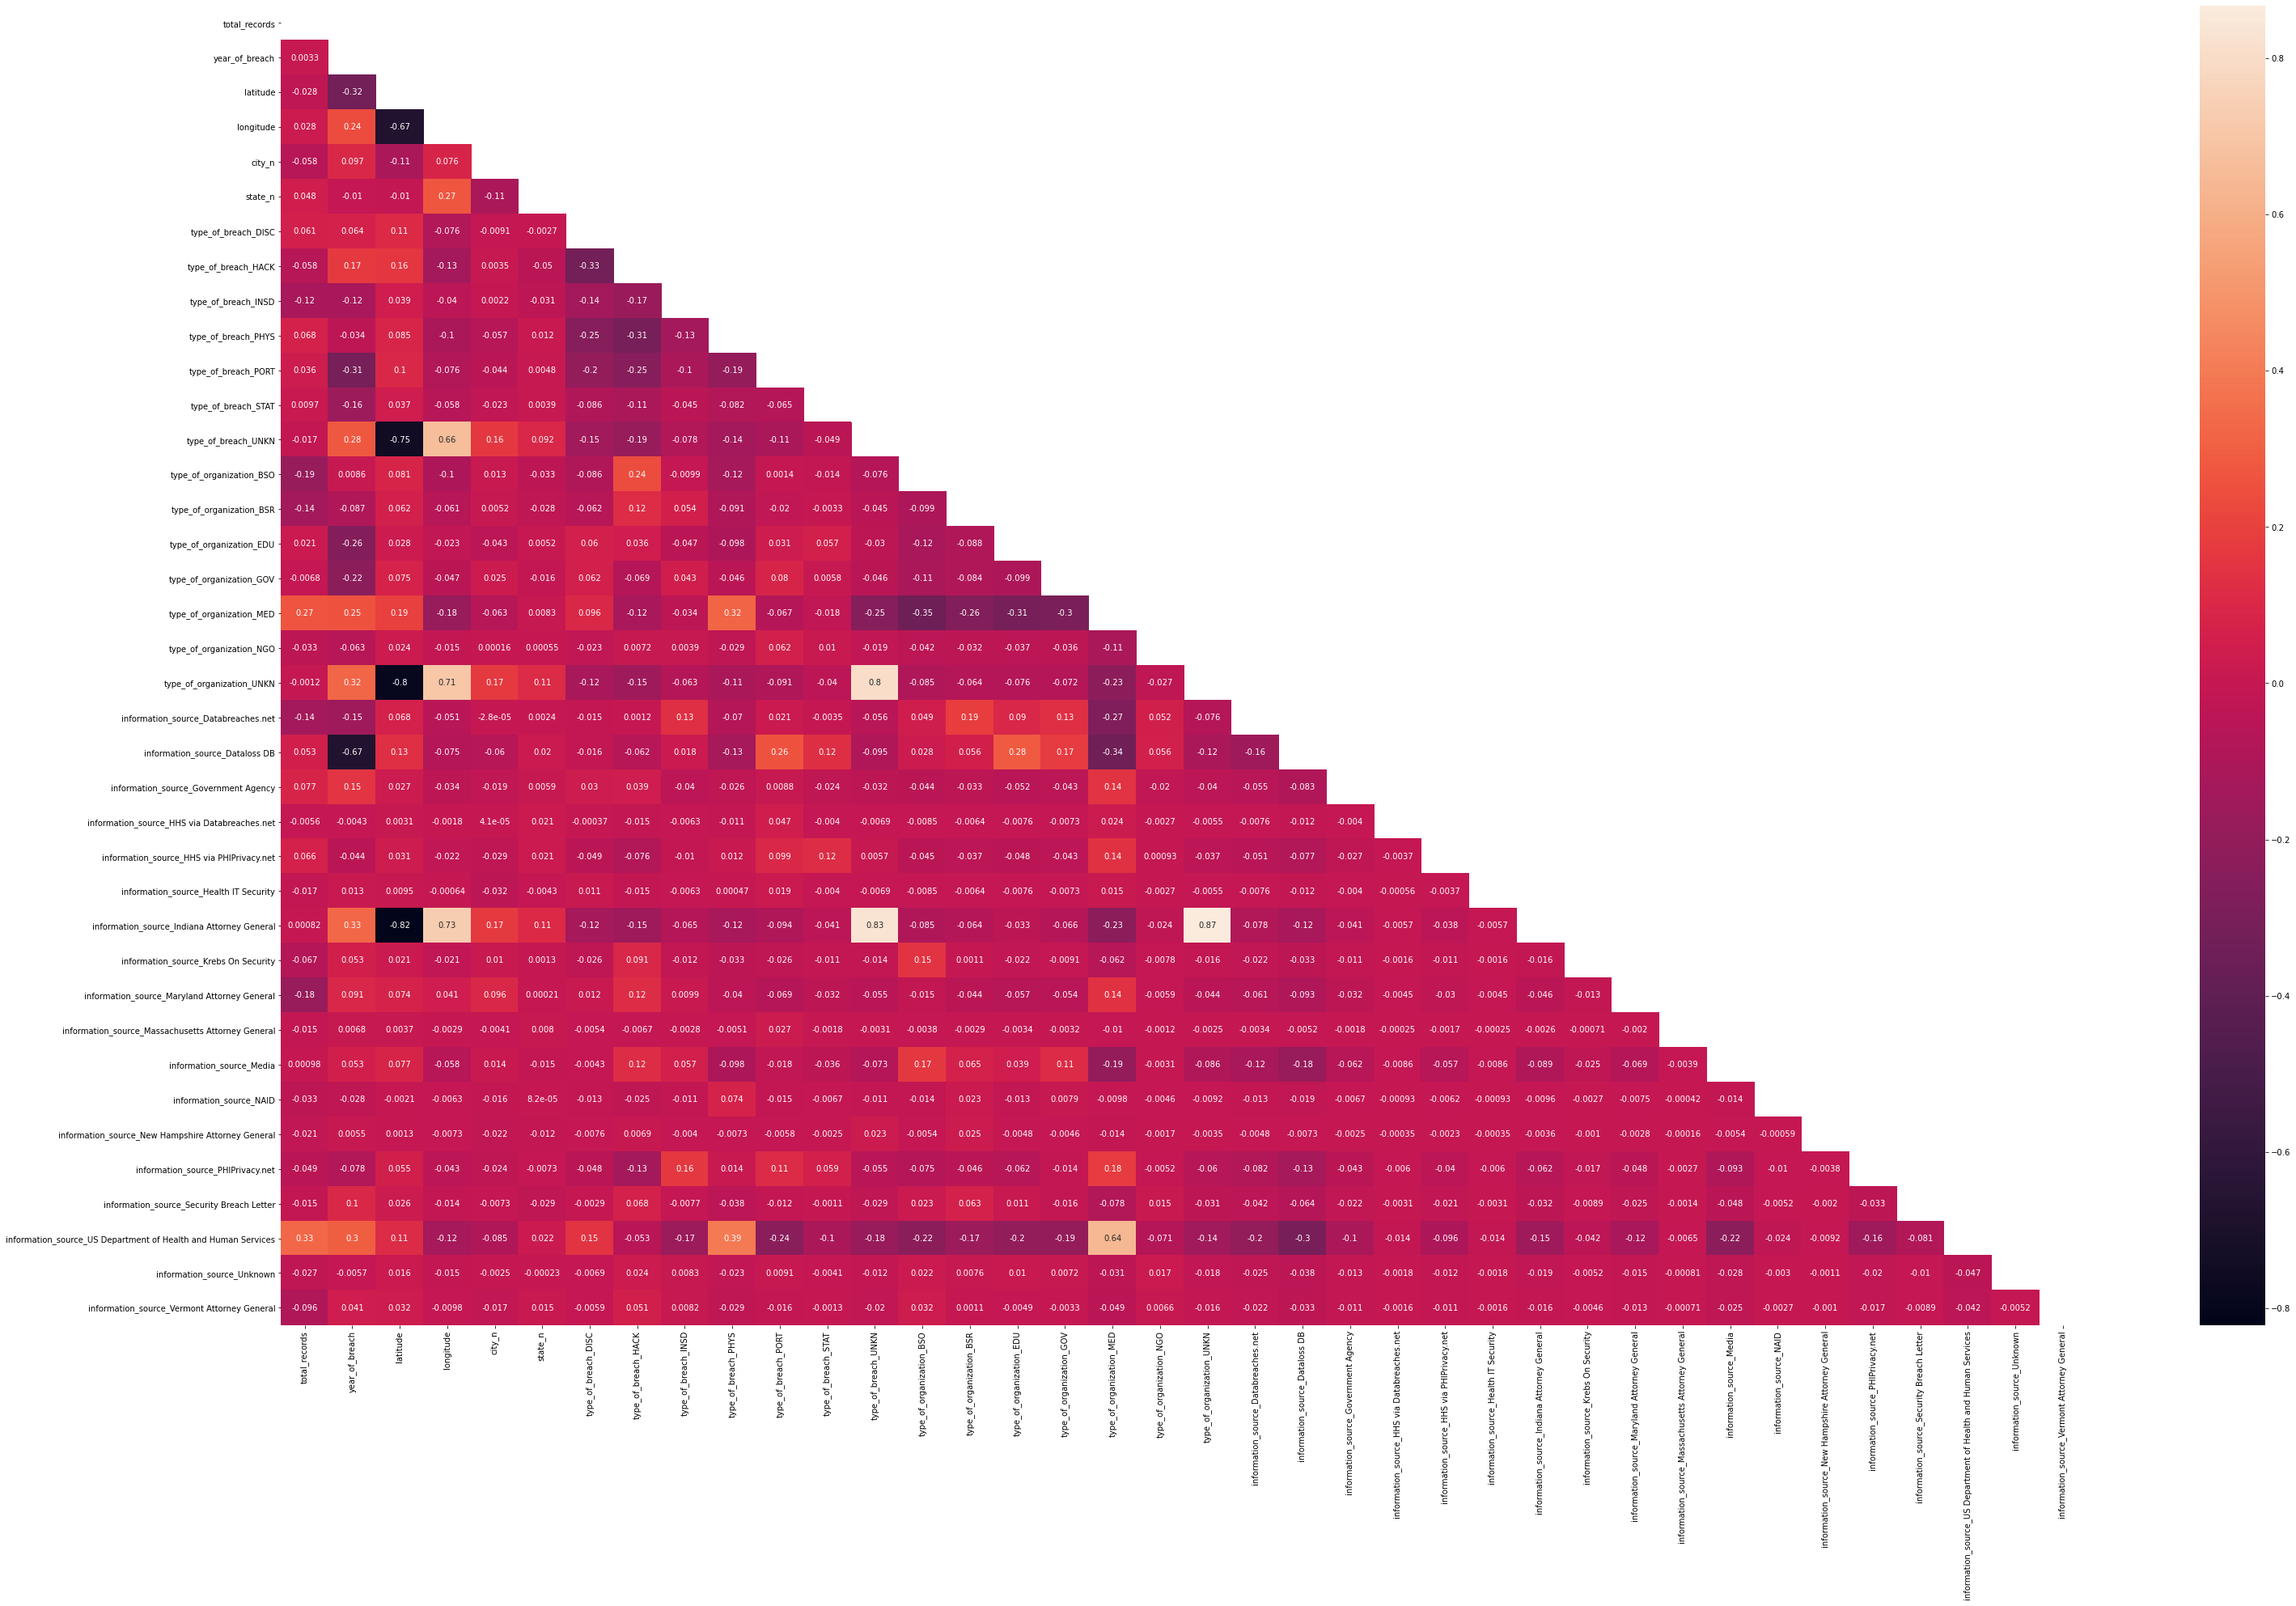

In [97]:

correlations_matrix = data_copy.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50, 30))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [98]:
#Preparing kmeans for our first model 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=39, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=39, random_state=1234)

In [99]:
import joblib 

In [100]:
#storing the model 

joblib.dump(kmeans, 'model.pkl')  
model_loaded = joblib.load('model.pkl')

In [101]:
#checking number of values per cluster 
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0      251
1      283
2     1105
3      286
4      759
5      544
6      308
7      302
8      299
9       41
10       5
11       1
12     165
13       5
14      53
15      14
16     413
17      41
18     181
19     205
20     116
21     148
22     173
23     385
24     368
25     106
26     129
27     259
28     632
29      32
30     125
31       2
32      74
33     273
34     182
35     203
36     152
37     156
38     231
dtype: int64

In [102]:
#integrated our dataframe with the clusters

X_df = pd.DataFrame(X_prep)
X_df["cluster"] = clusters
X_df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,cluster
0,-0.341356,-1.848400,0.442850,0.422201,0.722120,0.473181,-0.509800,1.561341,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,1
1,-1.431851,-0.183768,0.224217,-1.256935,0.928012,-1.304706,-0.509800,-0.640475,-0.268578,-0.487756,2.586835,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,38
2,-1.431851,-0.183768,-0.260235,-1.072907,0.923584,-1.304706,-0.509800,-0.640475,-0.268578,-0.487756,2.586835,-0.168615,-0.291185,-0.361890,3.668442,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,22
3,-1.431851,-0.183768,-0.494646,-0.393954,-1.598039,1.390799,-0.509800,1.561341,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,38
4,0.887524,-0.183768,-0.260235,-1.072907,0.923584,-1.304706,-0.509800,-0.640475,-0.268578,-0.487756,2.586835,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,1.037450,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,3
5,-1.431851,-0.183768,-0.260235,-1.072907,0.923584,-1.304706,1.961552,-0.640475,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,38
6,1.072674,-0.183768,0.227035,-1.251749,0.440956,-1.304706,1.961552,-0.640475,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,1.037450,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,4
7,-1.431851,-0.183768,-0.251845,-0.359922,-1.046780,1.390799,1.961552,-0.640475,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,38
8,-1.431851,-0.183768,0.505664,0.436179,0.343544,0.645234,-0.509800,1.561341,-0.268578,-0.487756,-0.386573,-0.168615,-0.291185,-0.361890,3.668442,-0.322388,-0.308128,-0.963902,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,24
9,0.164177,-0.183768,0.241717,-1.217465,1.215818,-1.304706,-0.509800,-0.640475,-0.268578,2.050207,-0.386573,-0.168615,-0.291185,-0.361890,-0.272595,-0.322388,-0.308128,1.037450,-0.115710,-0.234373,-0.323018,-0.492285,-0.169311,-0.023568,-0.15675,-0.023568,-0.242179,-0.067623,-0.189113,-0.010537,-0.365608,-0.039456,-0.014903,-0.255266,-0.131017,-0.614694,-0.076936,-0.067623,2


In [103]:
# the smaller the inertia the better the clusters, our clusters do not have an optimal density, more data would be helpful
kmeans.inertia_

74186.67099156811

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

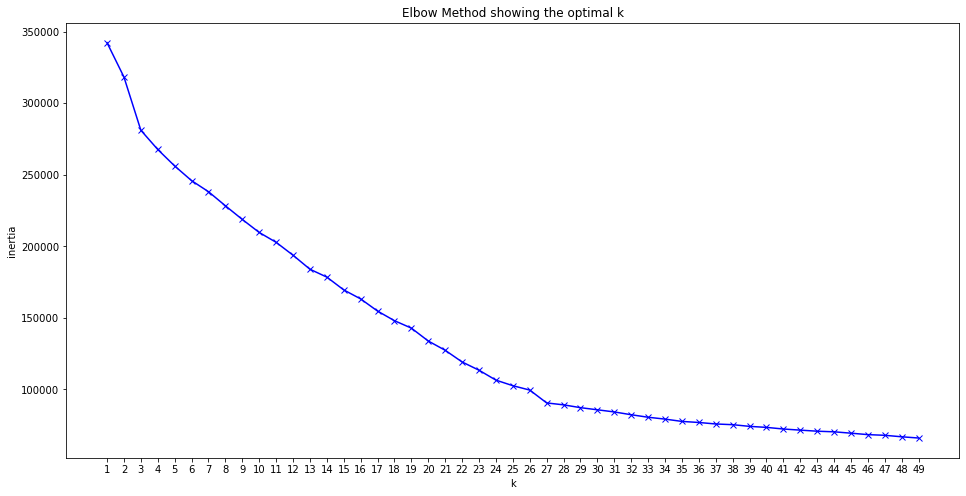

In [104]:
K = range(1, 50)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

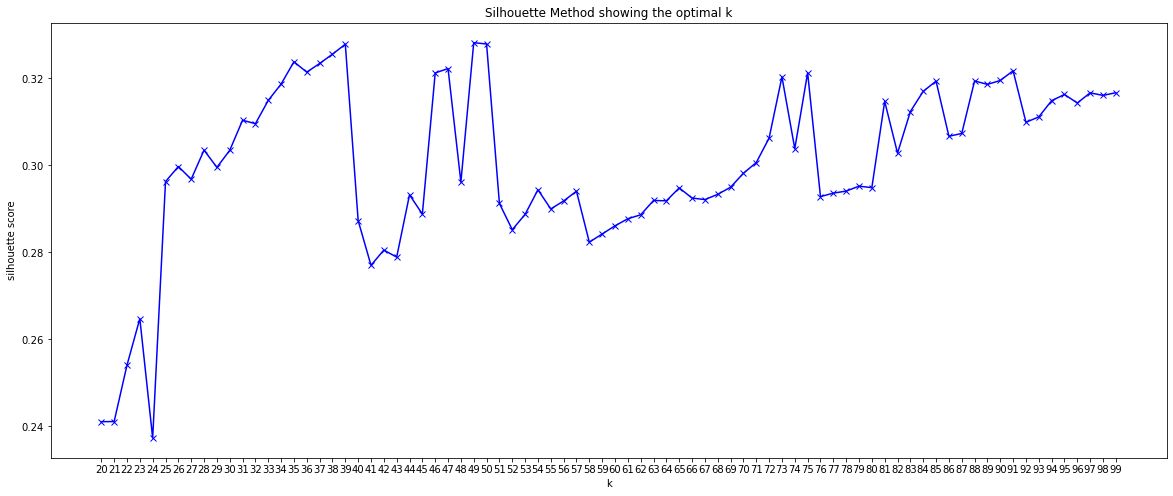

In [105]:
#from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score

K = range(20, 100)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(20,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [106]:
kmeans = KMeans(n_clusters=39,
                init="random",
                n_init=39,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=100,
                tol=0,
                algorithm="full",
                random_state=0)
kmeans.fit(X_prep)
print(kmeans.inertia_)

94491.53969031326


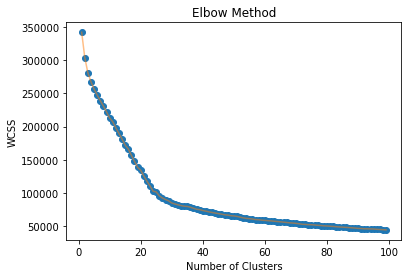

In [107]:
wcss = []
for i in range(1,100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,100), wcss, 'o')
plt.plot(range(1 , 100) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [108]:
wcss

[342265.999999999,
 304146.0944505,
 281086.5976707688,
 267631.95611997374,
 256516.95305440348,
 247463.34514398462,
 239052.13506190001,
 230986.75150734143,
 222280.35854929814,
 213000.16072045302,
 207354.02374486692,
 198118.30100271758,
 189722.07353334496,
 181355.64996063322,
 172057.0196591487,
 166337.75809963213,
 156791.18317255707,
 147745.95753858166,
 138696.35484072345,
 134221.93379381413,
 125602.32769775062,
 117792.09503403188,
 110598.38676534765,
 102613.21340054845,
 101501.77464959011,
 95606.36199724057,
 92332.1976950792,
 90028.92705583837,
 88102.05629775632,
 84864.38391367556,
 83340.93746743178,
 82152.60840372866,
 80931.9527472914,
 79970.25128986257,
 79612.10369361675,
 78523.6775266887,
 76866.3983163378,
 75405.37486662595,
 74775.41274605921,
 73481.83247072637,
 72557.8998814787,
 71422.11344921196,
 70502.81926475343,
 69624.34575499814,
 68886.90322005052,
 68026.50036107305,
 67146.89824205091,
 66646.17100301218,
 65705.65341790096,
 65295.8

In [109]:
kmeans = KMeans(n_clusters = 39, init = 'k-means++', max_iter = 100, n_init = 39, random_state = 0)
y_kmeans = kmeans.fit_predict(X_prep)

In [110]:
y_kmeans.shape

(9007,)

In [111]:
X_prep.shape

(9007, 38)

In [112]:
kmeans = KMeans(n_clusters=39)    
kmeans.fit(X_prep)
y_kmeans = kmeans.predict(X_prep)
y_kmeans

array([ 6,  8, 24, ..., 18, 18,  2])

In [113]:
data["cluster"]=clusters
data.head(30)

,date_made_public,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude,city_n,state_n,cluster
company,,,,,,,,,,,,,
PayDay OK LLC,2006-03-03,Princeton,NJ,HACK,BSF,88.0,California Attorney General,2006,40.058324,-74.405661,1112,36,1
"SF Fire Credit Union, Pacifica-Coastside Credit Union",2012-01-04,San Francisco,CA,PORT,BSF,0.0,California Attorney General,2012,37.774930,-122.419416,1205,5,38
"BDO USA, Rubio's Restaurants, Inc.",2012-02-18,San Diego,CA,PORT,BSR,0.0,California Attorney General,2012,32.715329,-117.157255,1203,5,22
"DHI Mortgage Company, Ltd.",2012-02-22,Austin,TX,HACK,BSF,0.0,California Attorney General,2012,30.267153,-97.743061,64,52,38
"Impairment Resources, LLC",2012-03-12,San Diego,CA,PORT,MED,14000.0,California Attorney General,2012,32.715329,-117.157255,1203,5,3
"RJL Insurance Services, LLC, RJL Wealth Management",2012-03-14,San Diego,CA,DISC,BSF,0.0,California Attorney General,2012,32.715329,-117.157255,1203,5,38
Kaiser Foundation Health Plan,2012-03-19,Oakland,CA,DISC,MED,30000.0,California Attorney General,2012,37.804364,-122.271114,985,5,4
"IndyMac Bank, IndyMac Resources, Inc.",2012-03-19,Dallas,TX,DISC,BSF,0.0,California Attorney General,2012,32.802955,-96.769923,313,52,38
Manhattan Prep,2012-03-23,New York,NY,HACK,BSR,0.0,California Attorney General,2012,40.714353,-74.005973,941,39,24


In [114]:
data.to_csv(r'Cluster_39.csv', index = False)


In [115]:
data = data.reset_index()

In [116]:
data

,company,date_made_public,city,state,type_of_breach,type_of_organization,total_records,information_source,year_of_breach,latitude,longitude,city_n,state_n,cluster
0,PayDay OK LLC,2006-03-03,Princeton,NJ,HACK,BSF,88.0,California Attorney General,2006,40.058324,-74.405661,1112,36,1
1,"SF Fire Credit Union, Pacifica-Coastside Credi...",2012-01-04,San Francisco,CA,PORT,BSF,0.0,California Attorney General,2012,37.774930,-122.419416,1205,5,38
2,"BDO USA, Rubio's Restaurants, Inc.",2012-02-18,San Diego,CA,PORT,BSR,0.0,California Attorney General,2012,32.715329,-117.157255,1203,5,22
3,"DHI Mortgage Company, Ltd.",2012-02-22,Austin,TX,HACK,BSF,0.0,California Attorney General,2012,30.267153,-97.743061,64,52,38
4,"Impairment Resources, LLC",2012-03-12,San Diego,CA,PORT,MED,14000.0,California Attorney General,2012,32.715329,-117.157255,1203,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9002,"Mark D. Lurie, MD",2009-11-20,San Francisco,CA,PHYS,MED,5166.0,US Department of Health and Human Services,2009,37.774930,-122.419416,1205,5,2
9003,Health Services for Children with Special Need...,2009-11-17,Washington,DC,PHYS,MED,3800.0,US Department of Health and Human Services,2009,38.895112,-77.036366,1450,10,2
9004,Alaska Department of Health and Social Services,2009-10-30,Ketchikan,AK,PHYS,MED,501.0,US Department of Health and Human Services,2009,55.342222,-131.646111,665,0,2
9005,"Mid America Kidney Stone Association, LLC",2009-10-28,St. Louis,MO,PHYS,MED,1000.0,US Department of Health and Human Services,2009,38.627003,-90.199404,1318,30,2


In [117]:
#data.to_csv(r'Cluster_data3.csv', index = False)
# save CSV file for tableau data visualization

In [118]:
# inspecting the cluster with biggest data breach to check what is inside and if the grouping by clusters make sense 
data[data['cluster']==27].values

array([['Ernst & Young', Timestamp('2006-06-01 00:00:00'), 'New York',
        ..., 941, 39, 27],
       ['News accounts are not clear as to source, but thought to be a realty office',
        Timestamp('2007-01-02 00:00:00'), 'Las Vegas', ..., 716, 38, 27],
       ['Science Applications International Corp. (SAIC)',
        Timestamp('2007-03-19 00:00:00'), 'Boise', ..., 134, 17, 27],
       ...,
       ['Nuance Communications', Timestamp('2018-06-12 00:00:00'),
        'San Francisco', ..., 1205, 5, 27],
       ['Exactis', Timestamp('2018-07-03 00:00:00'), 'Palm Coast', ...,
        1035, 12, 27],
       ['Facebook, Inc.', Timestamp('2018-09-28 00:00:00'),
        'San Francisco', ..., 1205, 5, 27]], dtype=object)